### Practicing Convolutional Neural Networks CIFAR 100 Challenge  
**Author: Zak Hussain**  
**Date: 12/13/2019**

**Purpose:**  
The purpose of this notebook is to use Neural nets to perform classificaiton on the the CIFAR 100 dataset.

**Import in keras tools that will be used**

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


**Check that GPU is enabled**

In [2]:
 from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2154041625520619214
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4937233203
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2119555287756550214
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


['/job:localhost/replica:0/task:0/device:GPU:0']

define a method to plot a visual to check for overfitting (found on keras)

In [3]:
from matplotlib import pyplot

# plot diagnostic learning curves (from keras)
def plot_acc_and_cel(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='green', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='validation')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='green', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='validation')

Initial Setup: 

In [4]:
batch_size = 50
num_classes = 100
epochs = 200

# get the data, split between (x,y) and test sets:
(X, y), (X_test, y_test) = cifar100.load_data()

# normalize values between 0 and 1
X = X.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert categorical info using one-hot-encoding.
y = keras.utils.to_categorical(y, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
from sklearn.model_selection import train_test_split

# use sklearn to form the dev set from X and y
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=.05) 

In [6]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_dev.shape[0], 'validation samples') 
print(X_test.shape[0], 'test samples')

x_train shape: (47500, 32, 32, 3)
47500 train samples
2500 validation samples
10000 test samples


**Define a Baseline Model**

In [7]:
def make_VGG_model(): 
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='softmax'))
    return model

**Compile and fit a baseline model using sgd optimizer**

In [10]:
from keras.optimizers import SGD

# compile model
baseline_model = make_VGG_model()

# compile baseline with SGD optimizer model
sgd_opt = SGD(lr=0.001, momentum=0.9)
baseline_model.compile(optimizer=sgd_opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# fit the model
baseline_history = baseline_model.fit(X_train, y_train,
                                batch_size=batch_size,
                                epochs=epochs,
                                validation_data=(X_dev, y_dev),
                                workers=4)

Train on 47500 samples, validate on 2500 samples
Epoch 1/200
47500/47500 [==============================] - 12s 254us/step - loss: 4.3896 - accuracy: 0.0444 - val_loss: 4.0459 - val_accuracy: 0.0936
Epoch 2/200
47500/47500 [==============================] - 10s 216us/step - loss: 3.8403 - accuracy: 0.1187 - val_loss: 3.6999 - val_accuracy: 0.1436
Epoch 3/200
47500/47500 [==============================] - 10s 214us/step - loss: 3.4823 - accuracy: 0.1776 - val_loss: 3.4069 - val_accuracy: 0.1904
Epoch 4/200
47500/47500 [==============================] - 10s 215us/step - loss: 3.2271 - accuracy: 0.2208 - val_loss: 3.2755 - val_accuracy: 0.2260
Epoch 5/200
47500/47500 [==============================] - 10s 215us/step - loss: 3.0165 - accuracy: 0.2600 - val_loss: 3.0915 - val_accuracy: 0.2588
Epoch 6/200
47500/47500 [==============================] - 10s 215us/step - loss: 2.8338 - accuracy: 0.2979 - val_loss: 2.9541 - val_accuracy: 0.2740
Epoch 7/200
47500/47500 [==========================

Epoch 55/200
47500/47500 [==============================] - 10s 210us/step - loss: 0.1098 - accuracy: 0.9642 - val_loss: 7.7923 - val_accuracy: 0.3608
Epoch 56/200
47500/47500 [==============================] - 10s 215us/step - loss: 0.1117 - accuracy: 0.9645 - val_loss: 7.8656 - val_accuracy: 0.3388
Epoch 57/200
47500/47500 [==============================] - 10s 212us/step - loss: 0.0860 - accuracy: 0.9721 - val_loss: 7.6080 - val_accuracy: 0.3640
Epoch 58/200
47500/47500 [==============================] - 10s 213us/step - loss: 0.0919 - accuracy: 0.9697 - val_loss: 7.4716 - val_accuracy: 0.3652
Epoch 59/200
47500/47500 [==============================] - 10s 215us/step - loss: 0.0853 - accuracy: 0.9731 - val_loss: 7.8778 - val_accuracy: 0.3468
Epoch 60/200
47500/47500 [==============================] - 10s 211us/step - loss: 0.0894 - accuracy: 0.9712 - val_loss: 7.9257 - val_accuracy: 0.3484
Epoch 61/200
47500/47500 [==============================] - 10s 212us/step - loss: 0.0955 - ac

Epoch 163/200
47500/47500 [==============================] - 10s 216us/step - loss: 0.0220 - accuracy: 0.9927 - val_loss: 11.1928 - val_accuracy: 0.3636
Epoch 164/200
47500/47500 [==============================] - 10s 216us/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 11.1937 - val_accuracy: 0.3616
Epoch 165/200
47500/47500 [==============================] - 10s 215us/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 11.5323 - val_accuracy: 0.3576
Epoch 166/200
47500/47500 [==============================] - 10s 211us/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 11.0635 - val_accuracy: 0.3644
Epoch 167/200
47500/47500 [==============================] - 10s 211us/step - loss: 0.0523 - accuracy: 0.9840 - val_loss: 10.9755 - val_accuracy: 0.3504
Epoch 168/200
47500/47500 [==============================] - 10s 211us/step - loss: 0.0532 - accuracy: 0.9840 - val_loss: 10.9130 - val_accuracy: 0.3536
Epoch 169/200
47500/47500 [==============================] - 10s 213us/step - loss

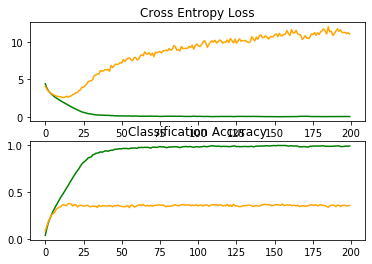

In [12]:
plot_acc_and_cel(baseline_history)

**Discuss the Baseline model:**  
For the Baseline model, I looked at using a VGG-based architecture. This is a general architecture in image classification. It uses stacked, 3x3 convolutional filters that feed in to a maxpooling layer (forming a block). these blocks are repeated to increase the depth of the network. Each layer also uses the Relu activatation func. the hidden layer output is flattened and fed to softmax in the output layer consisting of 100 nodes each for a possible class. In terms of optimizers, I use stochastic gradient descent (sgd). This will optimize the cross entropy function.

**Observation:**    
At first I tried one block for the hidden layers of my VGG network, but this showed an even larger amount of overfitting than seen in the Cross Entropy Loss plot above (note the green represents training data performance, and the yellow is validation performance). Increasing the blocks from 1 to 3 reduced the rate of covergance between the training and validation data, though the overfitting is cleary visible at around 12 epochs. The accuracy of this model landed on 99% accuracy on the training, and 36% on the validation. The overfitting mentioned may indicate that a model which uses means of regularization may be best. Using a dropout regularization model may This would slow down the convergance of the validation and training data. 

**Define a regularization model that uses dropout regularization**

In [8]:
def make_regularization_model(): 
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='softmax'))   
    
    return model

**Compile and fit a regularization model using sgd optimizer**

In [13]:
cnn_model = make_regularization_model()

# compile with SGD optimizer model
sgd_opt = SGD(lr=0.001, momentum=0.9)
cnn_model.compile(optimizer=sgd_opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
cnn_history = cnn_model.fit(X_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(X_dev, y_dev),
                            workers=4)

Train on 47500 samples, validate on 2500 samples
Epoch 1/200
47500/47500 [==============================] - 11s 236us/step - loss: 4.5891 - accuracy: 0.0151 - val_loss: 4.4995 - val_accuracy: 0.0312
Epoch 2/200
47500/47500 [==============================] - 11s 228us/step - loss: 4.3883 - accuracy: 0.0372 - val_loss: 4.2085 - val_accuracy: 0.0752
Epoch 3/200
47500/47500 [==============================] - 11s 229us/step - loss: 4.1751 - accuracy: 0.0640 - val_loss: 4.0250 - val_accuracy: 0.1036
Epoch 4/200
47500/47500 [==============================] - 11s 230us/step - loss: 3.9924 - accuracy: 0.0899 - val_loss: 3.8392 - val_accuracy: 0.1212
Epoch 5/200
47500/47500 [==============================] - 11s 229us/step - loss: 3.8164 - accuracy: 0.1132 - val_loss: 3.6754 - val_accuracy: 0.1520
Epoch 6/200
47500/47500 [==============================] - 11s 231us/step - loss: 3.6624 - accuracy: 0.1381 - val_loss: 3.5197 - val_accuracy: 0.1768
Epoch 7/200
47500/47500 [==========================

Epoch 55/200
47500/47500 [==============================] - 14s 290us/step - loss: 1.5862 - accuracy: 0.5525 - val_loss: 1.9468 - val_accuracy: 0.4872
Epoch 56/200
47500/47500 [==============================] - 13s 273us/step - loss: 1.5709 - accuracy: 0.5552 - val_loss: 1.9366 - val_accuracy: 0.4920
Epoch 57/200
47500/47500 [==============================] - 14s 298us/step - loss: 1.5537 - accuracy: 0.5624 - val_loss: 1.9181 - val_accuracy: 0.5064
Epoch 58/200
47500/47500 [==============================] - 14s 293us/step - loss: 1.5336 - accuracy: 0.5647 - val_loss: 1.9554 - val_accuracy: 0.4932
Epoch 59/200
47500/47500 [==============================] - 14s 290us/step - loss: 1.5255 - accuracy: 0.5655 - val_loss: 1.9361 - val_accuracy: 0.4924
Epoch 60/200
47500/47500 [==============================] - 13s 273us/step - loss: 1.5054 - accuracy: 0.5717 - val_loss: 1.9442 - val_accuracy: 0.4896
Epoch 61/200
47500/47500 [==============================] - 14s 292us/step - loss: 1.4895 - ac

Epoch 163/200
47500/47500 [==============================] - 15s 309us/step - loss: 0.7345 - accuracy: 0.7683 - val_loss: 2.1738 - val_accuracy: 0.5164
Epoch 164/200
47500/47500 [==============================] - 14s 294us/step - loss: 0.7423 - accuracy: 0.7654 - val_loss: 2.2607 - val_accuracy: 0.5076
Epoch 165/200
47500/47500 [==============================] - 15s 311us/step - loss: 0.7309 - accuracy: 0.7716 - val_loss: 2.2566 - val_accuracy: 0.5124
Epoch 166/200
47500/47500 [==============================] - 15s 317us/step - loss: 0.7284 - accuracy: 0.7691 - val_loss: 2.2394 - val_accuracy: 0.5096
Epoch 167/200
47500/47500 [==============================] - 16s 330us/step - loss: 0.7252 - accuracy: 0.7699 - val_loss: 2.2231 - val_accuracy: 0.5196
Epoch 168/200
47500/47500 [==============================] - 13s 275us/step - loss: 0.7260 - accuracy: 0.7711 - val_loss: 2.2132 - val_accuracy: 0.5156
Epoch 169/200
47500/47500 [==============================] - 14s 295us/step - loss: 0.71

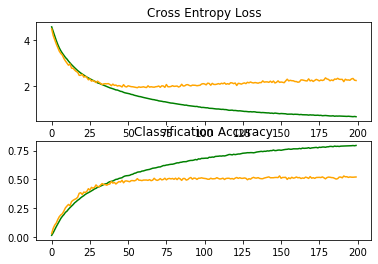

In [15]:
plot_acc_and_cel(cnn_history)

**Discuss the CNN:**  
Dropout regularization is a technique that drops a fixed number of node each epoch. I use this in for the cnn model by adding a dropout after every maxpooling layer. I set the rate of droupout to .2, which means 20% nodes will be dropped. I use the same optimizer as in the VGG model, and the ouput layer is also softmax. 

**Observations:** 
As I hoped, the Cross Entropy Loss plot shown above indicates that the rate of convergence between the green(training) and the yellow(validation) decreased, and does not converge until approx the 30th epoch. It's clear that 200 epochs may be too high a starting point, as the models' performances thus far have stopped improving well before even the 100th epoch. The resultin accuracy on the test after the 200th epoch landed at 79%, and 52% on the validation. It would be possible to try a wight decay model using L2 wight regularization, but given the time contraints, I will keras's data augmentation capability to see how it performs on this image set (mainly cause I've been wanting to give it a try, not because I expect it to be the best model for this task.)

**Compile and fit a data augmentation model using RMSprop optimizer**

In [9]:
def make_data_augmentation_model(): 
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    return model 

In [16]:
data_augmentation_model = make_data_augmentation_model()

# compile model with RMSprop optimizer
data_augmentation_model.compile(loss='categorical_crossentropy',
          optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
          metrics=['accuracy'])

# This will do preprocessing and realtime data augmentation:
# horizontal flip randomly flip images
datagen = ImageDataGenerator(
                            fill_mode='nearest',
                            cval=0.,
                            horizontal_flip=True,  
                            data_format="channels_last")

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

In [17]:
# Fit the model on the batches generated by datagen.flow().
data_aug_history = data_augmentation_model.fit_generator(datagen.flow(X_train, y_train,
                                batch_size=batch_size),
                                epochs=epochs,
                                validation_data=(X_dev, y_dev),
                                workers=4)

Epoch 1/200
950/950 [==============================] - 13s 14ms/step - loss: 4.3754 - accuracy: 0.0366 - val_loss: 4.0925 - val_accuracy: 0.0940
Epoch 2/200
950/950 [==============================] - 10s 11ms/step - loss: 4.0142 - accuracy: 0.0863 - val_loss: 3.7543 - val_accuracy: 0.1508
Epoch 3/200
950/950 [==============================] - 11s 12ms/step - loss: 3.7508 - accuracy: 0.1304 - val_loss: 3.5255 - val_accuracy: 0.1904
Epoch 4/200
950/950 [==============================] - 12s 13ms/step - loss: 3.5695 - accuracy: 0.1609 - val_loss: 3.3876 - val_accuracy: 0.2144
Epoch 5/200
950/950 [==============================] - 11s 12ms/step - loss: 3.4335 - accuracy: 0.1847 - val_loss: 3.2437 - val_accuracy: 0.2312
Epoch 6/200
950/950 [==============================] - 13s 14ms/step - loss: 3.3221 - accuracy: 0.2044 - val_loss: 3.1645 - val_accuracy: 0.2424
Epoch 7/200
950/950 [==============================] - 15s 16ms/step - loss: 3.2185 - accuracy: 0.2219 - val_loss: 3.0581 - val_ac

950/950 [==============================] - 10s 10ms/step - loss: 2.0323 - accuracy: 0.4727 - val_loss: 2.0128 - val_accuracy: 0.4884
Epoch 114/200
950/950 [==============================] - 10s 10ms/step - loss: 2.0365 - accuracy: 0.4724 - val_loss: 2.0178 - val_accuracy: 0.4832
Epoch 115/200
950/950 [==============================] - 10s 10ms/step - loss: 2.0335 - accuracy: 0.4741 - val_loss: 2.0269 - val_accuracy: 0.4844
Epoch 116/200
950/950 [==============================] - 10s 10ms/step - loss: 2.0299 - accuracy: 0.4731 - val_loss: 1.9933 - val_accuracy: 0.4944
Epoch 117/200
950/950 [==============================] - 10s 10ms/step - loss: 2.0288 - accuracy: 0.4757 - val_loss: 1.9797 - val_accuracy: 0.4988
Epoch 118/200
950/950 [==============================] - 10s 10ms/step - loss: 2.0317 - accuracy: 0.4722 - val_loss: 2.0050 - val_accuracy: 0.4988
Epoch 119/200
950/950 [==============================] - 10s 10ms/step - loss: 2.0293 - accuracy: 0.4740 - val_loss: 2.0167 - val_ac

Epoch 169/200
950/950 [==============================] - 10s 10ms/step - loss: 2.0048 - accuracy: 0.4810 - val_loss: 1.9941 - val_accuracy: 0.5020
Epoch 170/200
950/950 [==============================] - 10s 10ms/step - loss: 2.0153 - accuracy: 0.4773 - val_loss: 1.9526 - val_accuracy: 0.4968
Epoch 171/200
950/950 [==============================] - 10s 10ms/step - loss: 2.0101 - accuracy: 0.4783 - val_loss: 2.0602 - val_accuracy: 0.4944
Epoch 172/200
950/950 [==============================] - 10s 11ms/step - loss: 1.9999 - accuracy: 0.4808 - val_loss: 1.9781 - val_accuracy: 0.5040
Epoch 173/200
950/950 [==============================] - 10s 10ms/step - loss: 2.0137 - accuracy: 0.4763 - val_loss: 2.0153 - val_accuracy: 0.4836
Epoch 174/200
950/950 [==============================] - 10s 10ms/step - loss: 2.0133 - accuracy: 0.4784 - val_loss: 1.9508 - val_accuracy: 0.5008
Epoch 175/200
950/950 [==============================] - 10s 10ms/step - loss: 2.0139 - accuracy: 0.4774 - val_loss: 2

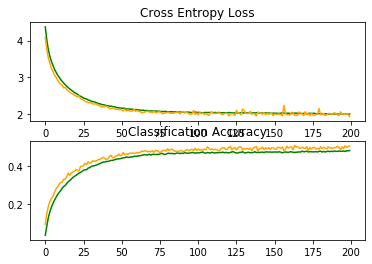

In [18]:
plot_acc_and_cel(data_aug_history)

**Discuss the Data Augmentation Model:**  
From what I've read, the data augmentation method uses the training data to generate a collection on copies with random modifications to each copy. For example, and image can be flipped horizontally or not. Aside from the defaults, When I instantiated the ImageDataGenerator object, I gave it a fill_mode='nearest', cval=0, horizontal_flip=True, and data_format="channels_last". There are also numerous other default parameters can be adjusted, but I arbitrarily chose this subset of parameters because I wanted to make copies with small modifications given the images are already small I don't want them to become too distorted. 

The model itself was given two maxpooling layers, each of which is followed by a dropout layer that drops 25% of the nodes. Just before being passed to softmax in the output layer, there is one last dropout layer that drops 50% of the nodes. 

**Observations**   
This model did not overfit which I'm very pleased with. This is seen in the plot above where the green(training) and yellow(validation) lines do not converge. preventing the overfitting may largely be a result of having included the dropout layers in the network, as this seems to be good for reducing convergance rates. Overall, this hdata augmentation model had an accuracy on the training of 48% and 50% on the validation. I will use this model on the test set in the next cell because I believe it may generalize the best, as it did not overfit.

**Evaluate Data Augmentation Model on The Test Set.**

In [21]:
# using the model with the best accuracy, perform the evaluation on the
# test set. 
scores = data_augmentation_model.evaluate(X_test, y_test, verbose=1)
print('test loss:', scores[0])
print('test accuracy:', scores[1])

10000/10000 [==============================] - 2s 192us/step
test loss: 1.8918956798553468
test accuracy: 0.5045999884605408


**Conclusion**  
The data augmentation model classified 50% of the images in the test set correctly. This is below the 75% for the best DL classifiers trained for the CIFAR challenge; however, it is still better than random chance, given that there are 100 possible classes to choose from. Were I to go back and do this challenge again, I would focus on tuning the data_augmentation + the dropout regularization. For examply I could change the dropout rate, or change the rotation of the copies in the data augementation set up, and much more. 